# Comparative Evaluation of Machine Learning Algorithms: The case of forest fires prediction 
<font color='black'>This is the updated script that I used for my Diploma Thesis <br> Available at: https://polynoe.lib.uniwa.gr/xmlui/handle/11400/2545 <br> </font>
<font color='black'>Vasileios Panagiotis Timoudas <br> </font>
<font color='black'>University of West Attica <br> </font>
<font color='black'>Faculty of engineering <br> </font>
<font color='black'>Department of Informatics and Computer Engineering <br> </font>
<font color='black'>July 2022</font>


### The libraries that I will use

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### <font color='black'>The dataset that I will use has <font color='red'> 244 data records <font color='black'>where they are forestry data of fires from <font color='red'>2 different regions of Algeria,<font color='black'> the Bejaia region and the Sidi-Bel Abbes region

In [2]:
# Importing dataframe
df = pd.read_csv('Algerian_Forest_Fires_Dataset.csv')

### <font color='black'>Replace the output names with  <font color='red'>0<font color='black'> and<font color='red'> 1<font color='black'> so the Python can use the dataframe

In [3]:
# Replace output with 0 and 1
output_names = ['not fire', 'fire']
dict = {'not fire': int(0), 'fire': int(1)}
df = df.replace({'Classes': dict})

### I will print the<font color='red'>  head,<font color='black'> the<font color='red'> tail<font color='black'> and the<font color='red'> description<font color='black'> of the dataframe

In [4]:
# Print the head of the dataframe
print(df.head().round(decimals = 2))

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  
0  0.5        0  
1  0.4        0  
2  0.1        0  
3  0.0        0  
4  0.5        0  


In [5]:
# Print the tail of the dataframe
print(df.tail().round(decimals = 2))

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
239   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
240   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
241   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
242   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
243   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI  Classes  
239  6.5        1  
240  0.0        0  
241  0.2        0  
242  0.7        0  
243  0.5        0  


In [6]:
# Print the description of the dataframe
print(df.describe().T.round(decimals = 2))

             count     mean    std     min      25%      50%      75%     max
day          244.0    15.75   8.83     1.0     8.00    16.00    23.00    31.0
month        244.0     7.50   1.11     6.0     7.00     7.50     8.00     9.0
year         244.0  2012.00   0.00  2012.0  2012.00  2012.00  2012.00  2012.0
Temperature  244.0    32.17   3.63    22.0    30.00    32.00    35.00    42.0
RH           244.0    61.94  14.88    21.0    52.00    63.00    73.25    90.0
Ws           244.0    15.50   2.81     6.0    14.00    15.00    17.00    29.0
Rain         244.0     0.76   2.00     0.0     0.00     0.00     0.50    16.8
FFMC         244.0    77.89  14.34    28.6    72.08    83.50    88.30    96.0
DMC          244.0    14.67  12.37     0.7     5.80    11.30    20.75    65.9
DC           244.0    49.29  47.62     6.9    13.27    33.10    68.15   220.4
ISI          244.0     4.76   4.15     0.0     1.40     3.50     7.30    19.0
BUI          244.0    16.67  14.20     1.1     6.00    12.45    

### I will plot the<font color='red'> histogram<font color='black'> and the<font color='red'> correlation matrix

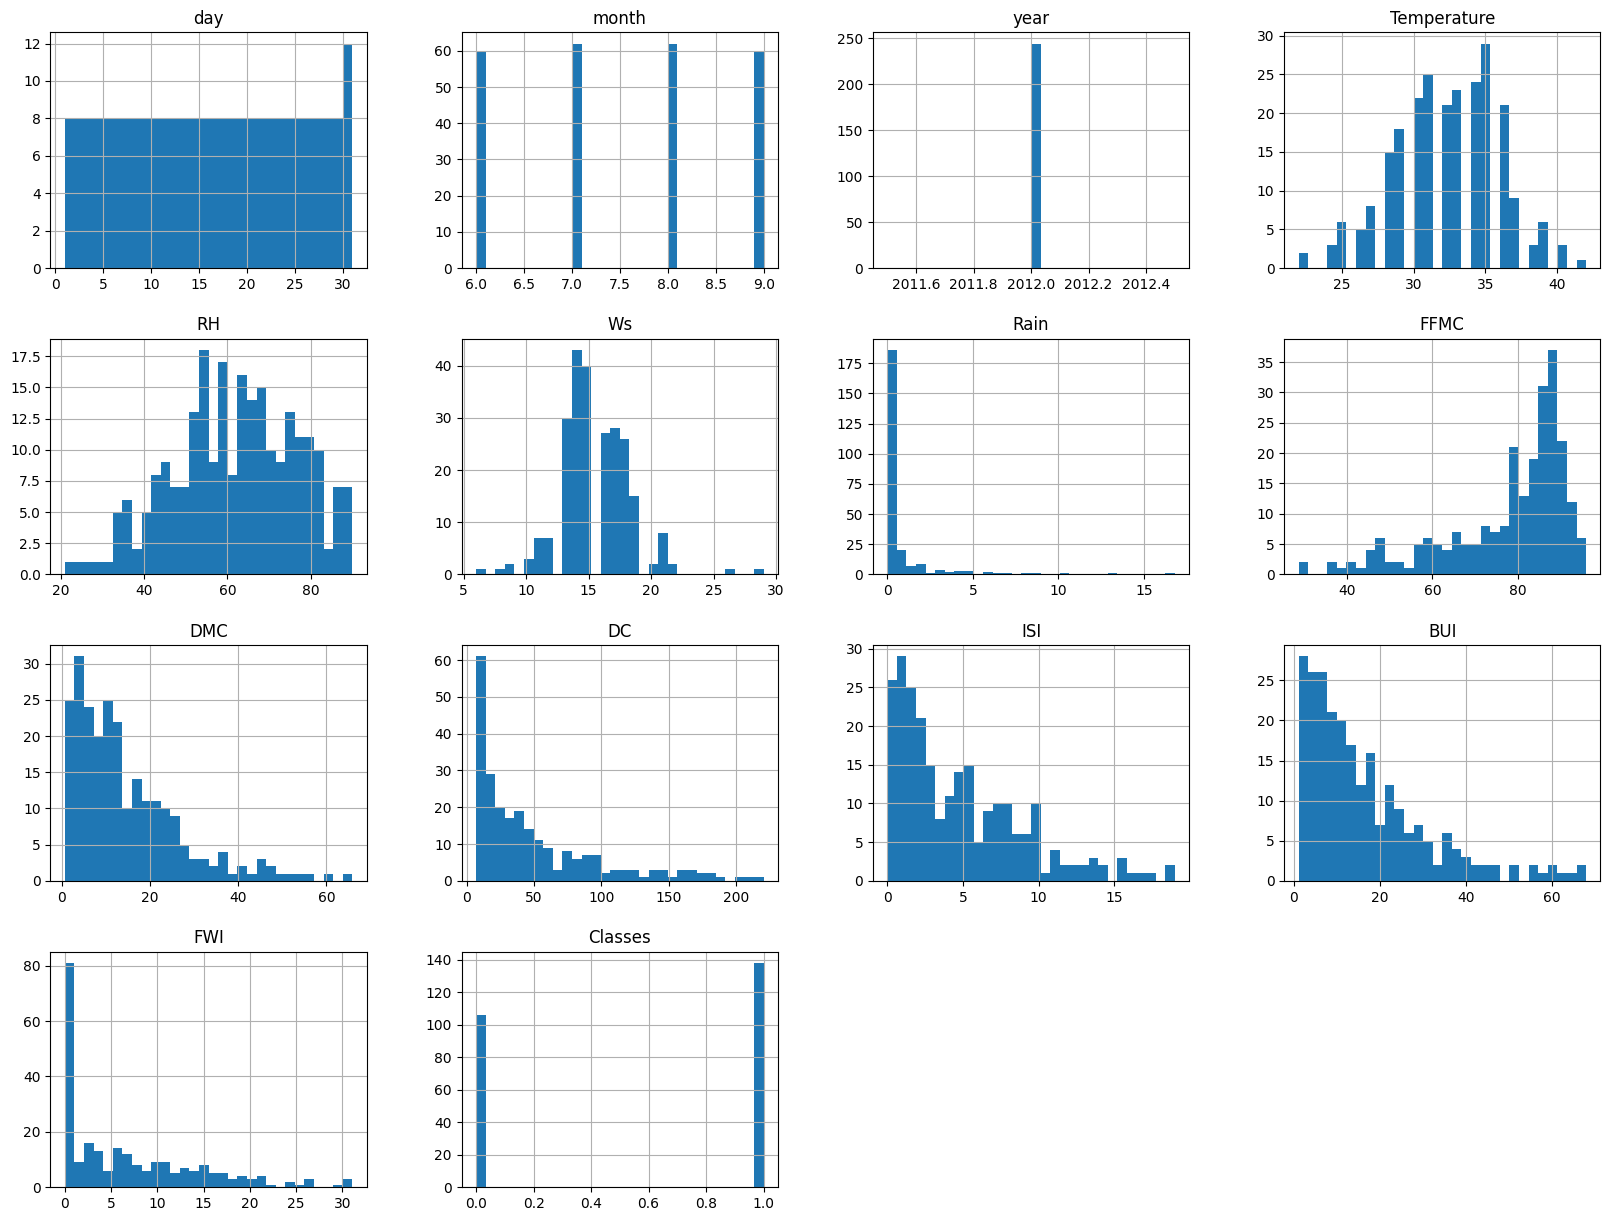

In [7]:
# Plot histogram
df.hist(bins=30, figsize=(20,15))
plt.show()

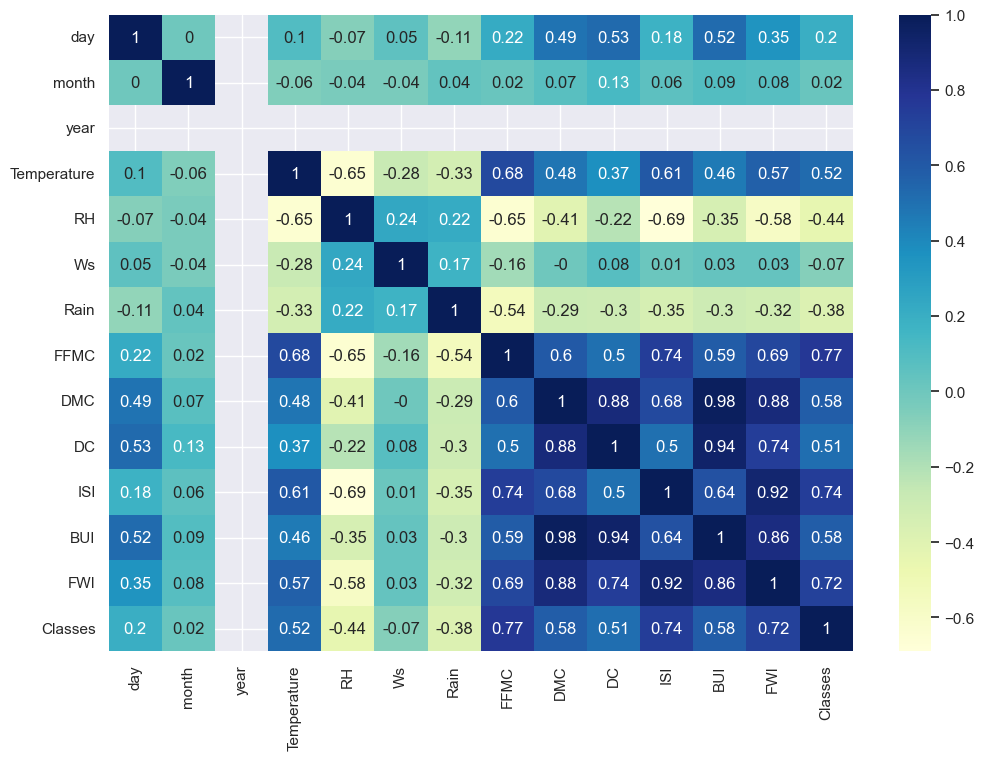

In [8]:
# Plot correlation matrix
corrMatrix = df.corr().round(decimals = 2)
sns.set(rc={'figure.figsize':(12,8.27)})
sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)
plt.show()

### <font color='red'>Data Cleaning <font color='black'>so the Machine Learning algorithms won't use unnecessary data

In [9]:
# Drop day, month and year
df = df.drop(['day', 'month', 'year'], axis=1)

# Drop duplicates
df = df.drop_duplicates()

### I put the dataframe values to the dataset so the Machine Learning algorithms can use them

In [10]:
# Put dataframe values to dataset
dataset = df.values
X = dataset[:, 0:10]
y = dataset[:,10].astype(int)

### I split the dataset into training set and test set

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### For the feature scaling I will use the algorithm<font color='red'> Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test) 

### <font color='black'> The <font color='red'>8 <font color='black'>classifiers that I will use:
<font color='black'> &nbsp; &nbsp; &nbsp; 1. K-Nearest Neighbors <br> </font>
<font color='black'> &nbsp; &nbsp; &nbsp; 2. Logistic Regression <br> </font>
<font color='black'> &nbsp; &nbsp; &nbsp; 3. Decision Trees <br> </font>
<font color='black'> &nbsp; &nbsp; &nbsp; 4. Random Forest <br> </font>
<font color='black'> &nbsp; &nbsp; &nbsp; 5. AdaBoost <br> </font>
<font color='black'> &nbsp; &nbsp; &nbsp; 6. Gradient Boosting <br> </font>
<font color='black'> &nbsp; &nbsp; &nbsp; 7. Multi-layer Perceptron <br> </font>
<font color='black'> &nbsp; &nbsp; &nbsp; 8. Bernoulli Naive Bayes <br> <br> </font>
<font color='black'>   I will use every classifier each time expect K-Nearest Neighbors that I will use 3 times with 3 different parameters</font>
### I initialize the above classifiers

In [13]:
# Initializing classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
classifiers = []
classifiers.append(('KNeighborsClassifier-3-euclidean', KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='distance')))
classifiers.append(('KNeighborsClassifier-5-manhattan', KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')))
classifiers.append(('KNeighborsClassifier-7-minkowski', KNeighborsClassifier(n_neighbors=7, metric='minkowski', weights='distance')))
classifiers.append(('DecisionTreeClassifier', DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)))
classifiers.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3)))
classifiers.append(('AdaBoostClassifier', AdaBoostClassifier(n_estimators=50, learning_rate=1.0)))
classifiers.append(('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)))
classifiers.append(('LogisticRegression', LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1, solver='liblinear')))
classifiers.append(('MLPClassifier', MLPClassifier(hidden_layer_sizes=(50, 50, 50), activation='relu', solver='adam', learning_rate='constant')))
classifiers.append(('BernoulliNB', BernoulliNB(alpha = 1.0, binarize = 0.0)))


### The evaluators for the supervised Machine Learning algorithms for my models
<font color='black'> &nbsp; &nbsp; &nbsp; 1. Accuracy <br> </font>
<font color='black'> &nbsp; &nbsp; &nbsp; 2. Precision <br> </font>
<font color='black'> &nbsp; &nbsp; &nbsp; 3. Recall <br> </font>
<font color='black'> &nbsp; &nbsp; &nbsp; 4. F1-score <br> </font>
### I initialize the above evaluators

In [14]:
# Initializig evaluators
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
model_names = []

### Now I will<font color='red'> fit, predict<font color='black'> and <font color='red'>evaluate <font color='black'>each model

In [15]:
for name, classifier in classifiers:
    # Fit the model
    classifier.fit(X_train, y_train)
    
    # Make prediction
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    
    # Put results in lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    
    model_names.append(name)

# Now I will plot the<font color='red'> results
### I plot the <font color='red'>confusion matrices together<font color='black'> and<font color='red'> seperate <font color='black'>for each classifier

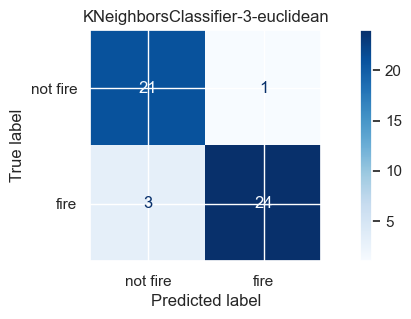

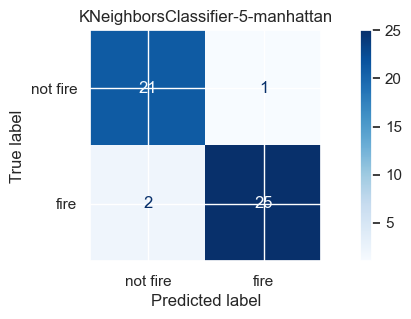

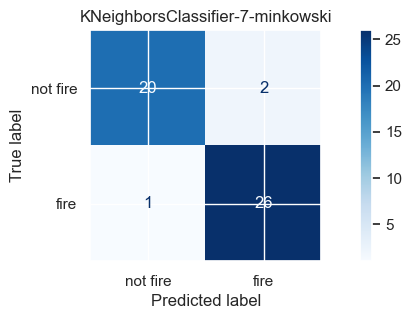

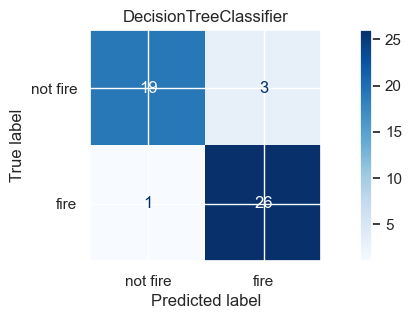

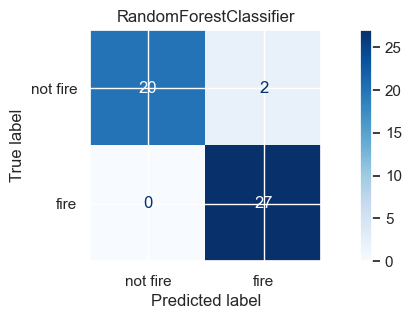

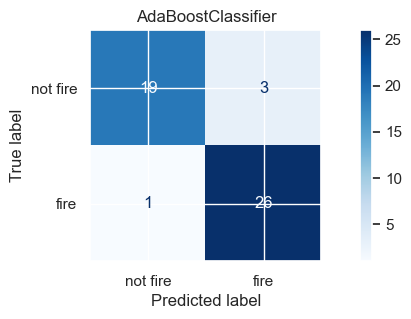

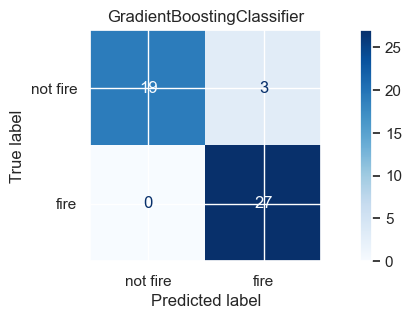

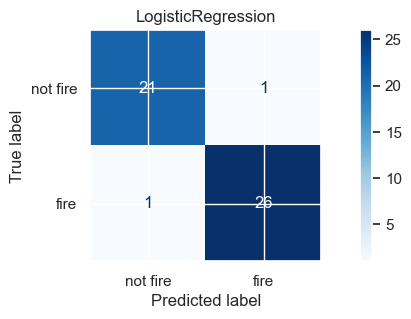

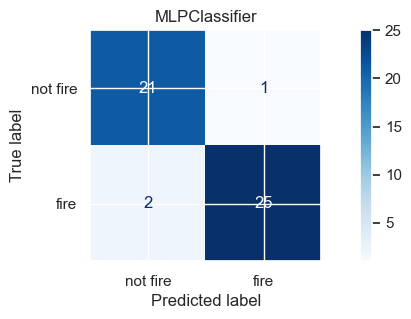

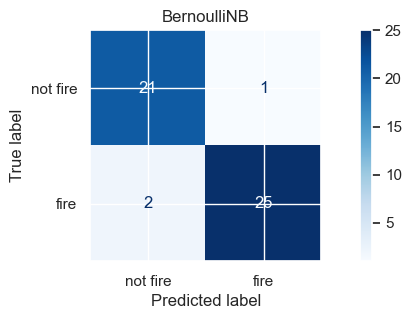

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrices seperate
for name, classifier in classifiers:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, 
                                          X_test, 
                                          y_test, 
                                          cmap=plt.cm.Blues,
                                          display_labels=output_names)
    fig = disp.ax_.get_figure() 
    fig.set_figwidth(10)
    fig.set_figheight(3)
    
    disp.ax_.set_title(name)

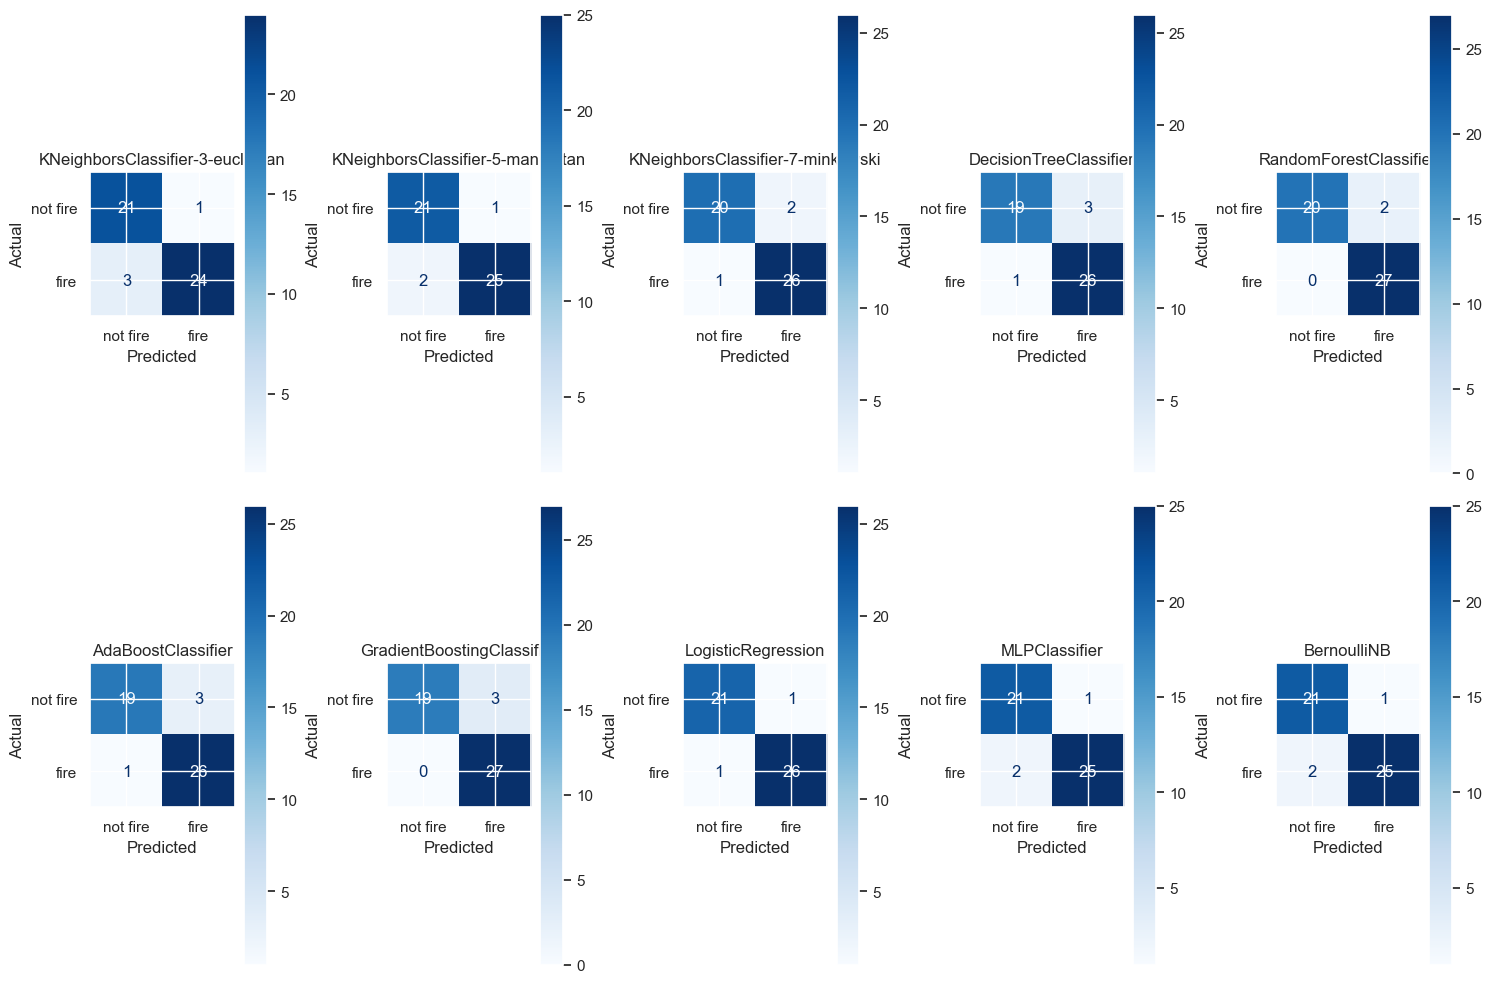

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10))

# Plot confusion matrices together
for (name, classifier), ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay.from_estimator(classifier, 
                                          X_test, 
                                          y_test, 
                                          ax=ax, 
                                          cmap=plt.cm.Blues, 
                                          display_labels=output_names)
    
    ax.set_title(name, rotation=0) # , fontsize=12
    ax.set_xlabel('Predicted') # , rotation=0, fontsize=12
    ax.set_ylabel('Actual') #, rotation=0, fontsize=12

plt.tight_layout()  
plt.show()

### I plot the<font color='blue'> accuracy<font color='black'> for each classifier

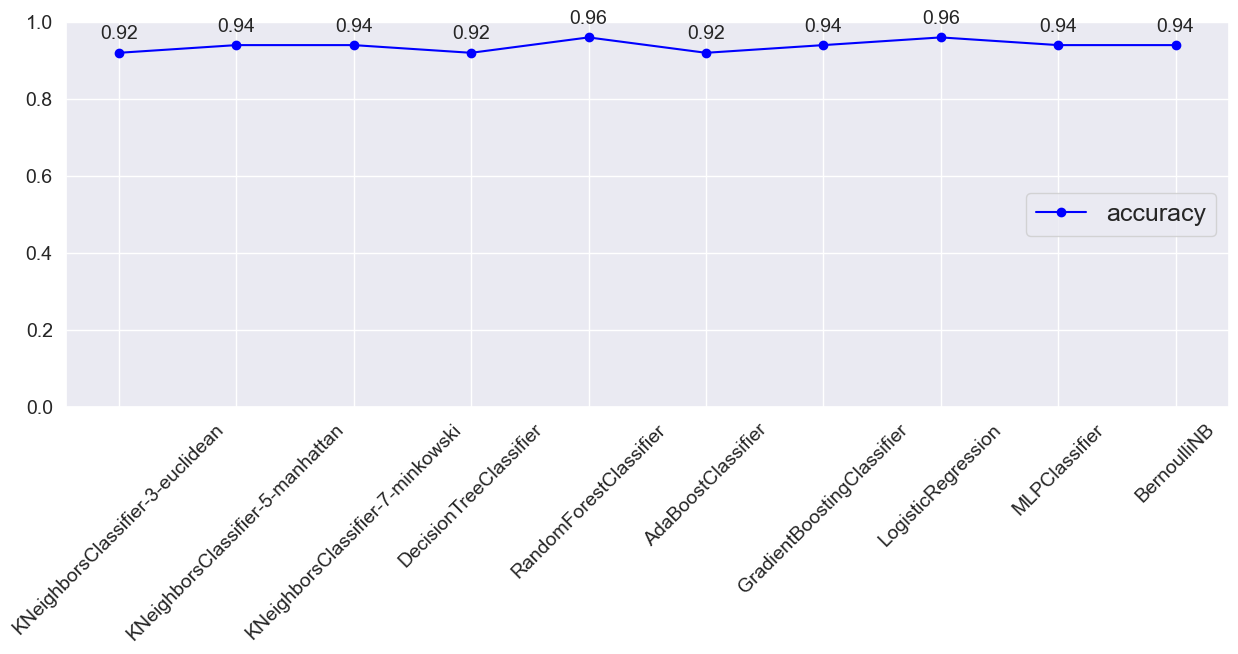

In [18]:
# Plot accuracy
plt.figure(figsize=(15, 5))
plt.plot(model_names, accuracy_list, color='blue', marker='o')
plt.legend(['accuracy'], loc='right', fontsize=18)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

for i in range(len(accuracy_list)):
    plt.annotate(accuracy_list[i], (model_names[i], accuracy_list[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)


plt.show()

### I plot the<font color='orange'> precision <font color='black'> for each classifier

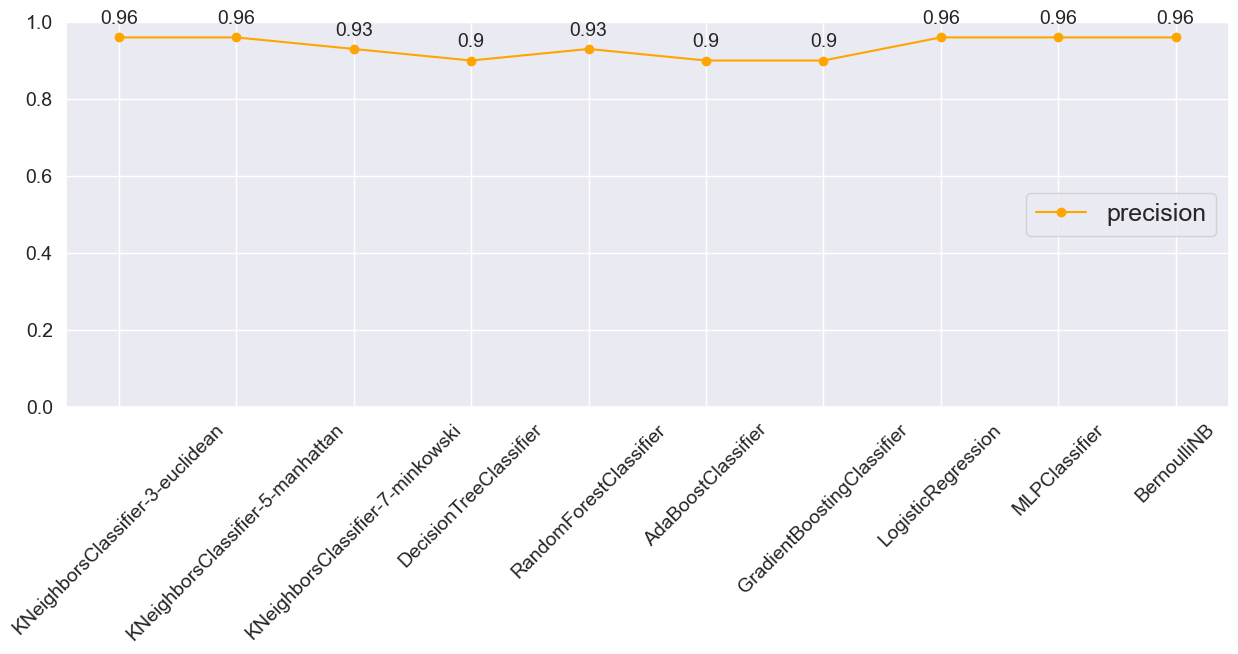

In [19]:
# Plot precision
plt.figure(figsize=(15, 5))
plt.plot(model_names, precision_list, color='orange', marker='o')
plt.legend(['precision'], loc='right', fontsize=18)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

for i in range(len(precision_list)):
    plt.annotate(precision_list[i], (model_names[i], precision_list[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)

    
plt.show()

### I plot the<font color='green'>  recall<font color='black'>  for each classifier

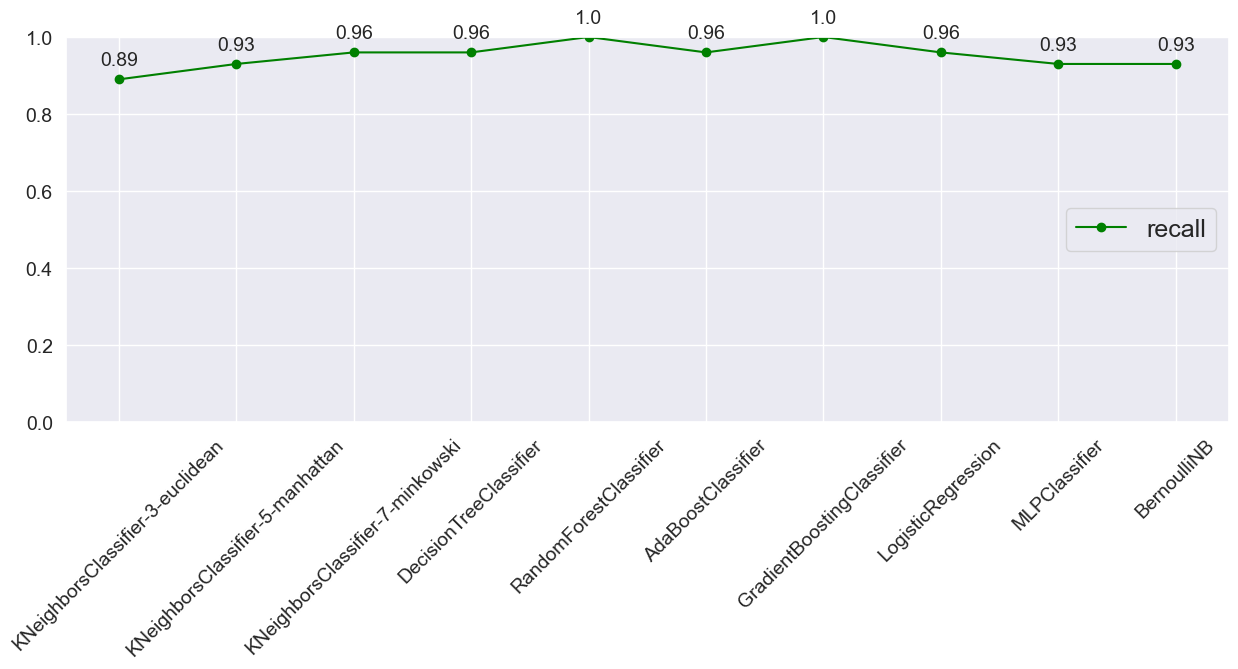

In [20]:
# Plot recall
plt.figure(figsize=(15, 5))
plt.plot(model_names, recall_list, color='green', marker='o')
plt.legend(['recall'], loc='right', fontsize=18)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

for i in range(len(recall_list)):
    plt.annotate(recall_list[i], (model_names[i], recall_list[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)

plt.show()

### I plot the<font color='red'>  f1 score<font color='black'>  for each classifier

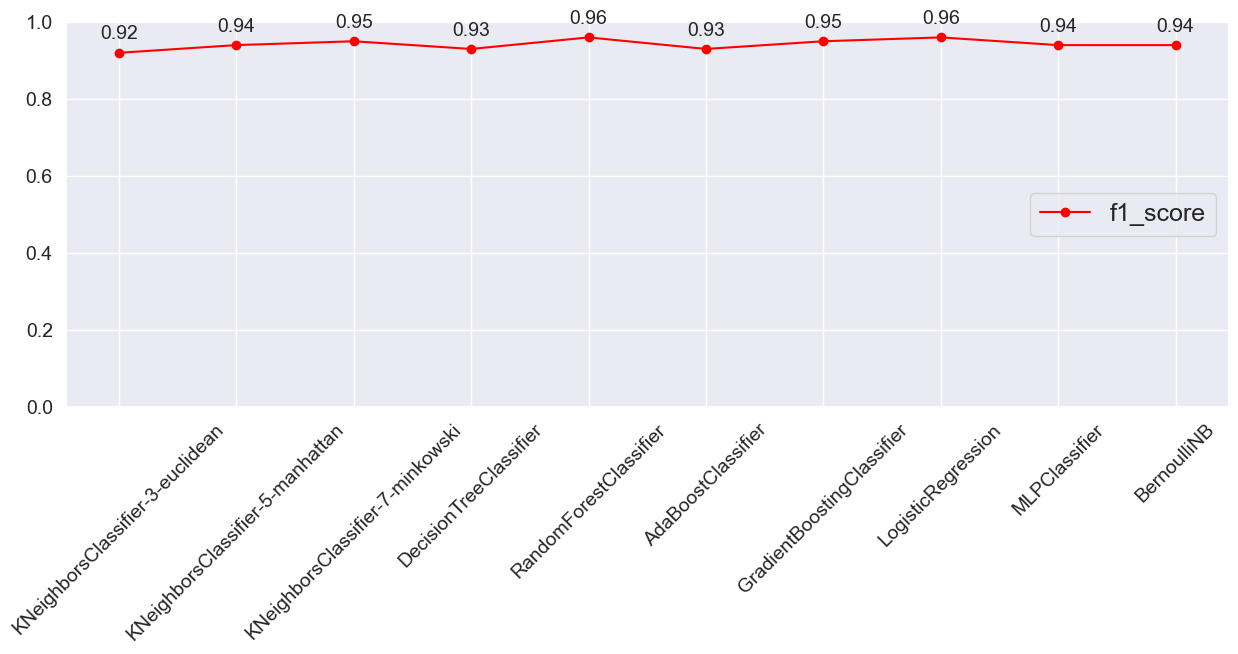

In [21]:
# Plot f1 score
plt.figure(figsize=(15, 5))
plt.plot(model_names, f1_score_list, color='red', marker='o')
plt.legend(['f1_score'], loc='right', fontsize=18)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

for i in range(len(f1_score_list)):
    plt.annotate(f1_score_list[i], (model_names[i], f1_score_list[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)

plt.show()

### I plot the<font color='red'> evaluating results together<font color='black'> and <font color='red'>seperate <font color='black'>for each classifier

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2999584985.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


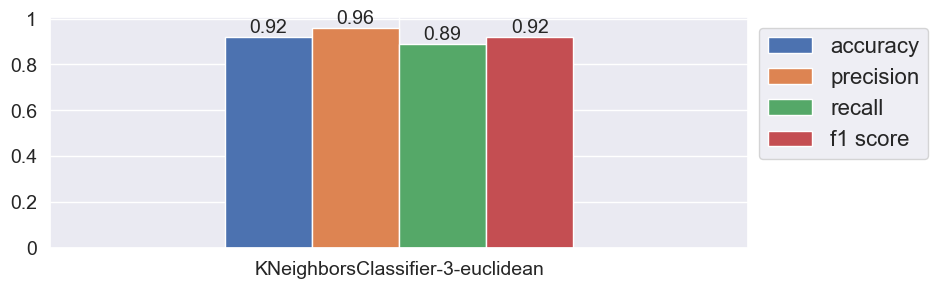

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2999584985.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


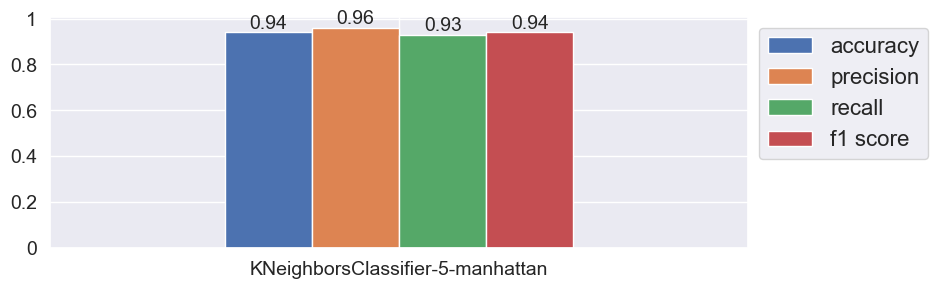

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2999584985.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


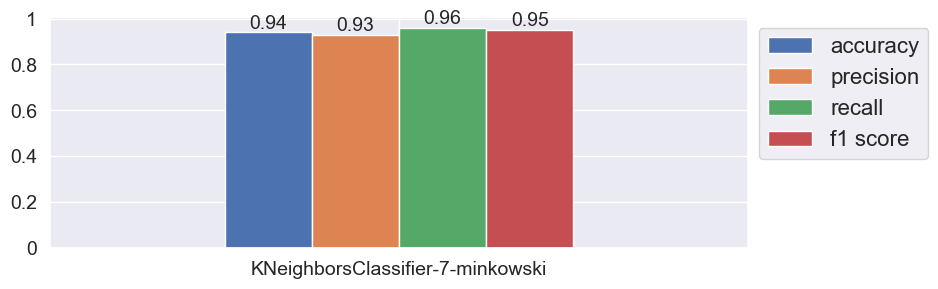

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2999584985.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


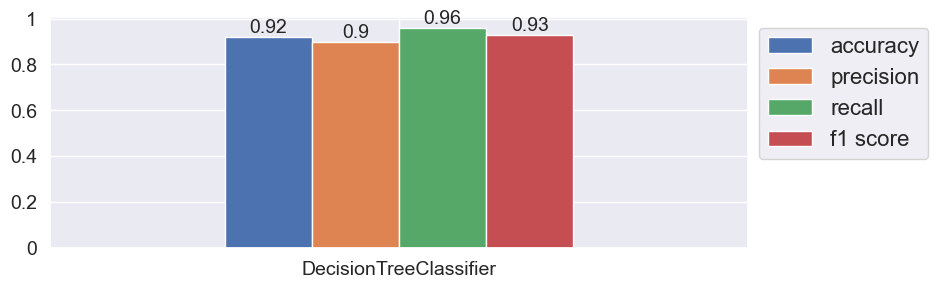

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2999584985.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


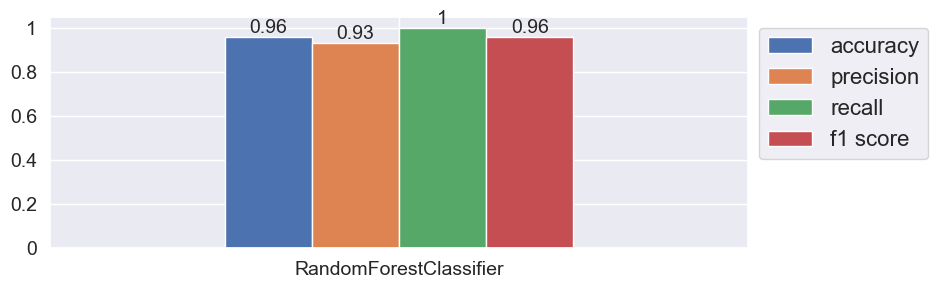

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2999584985.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


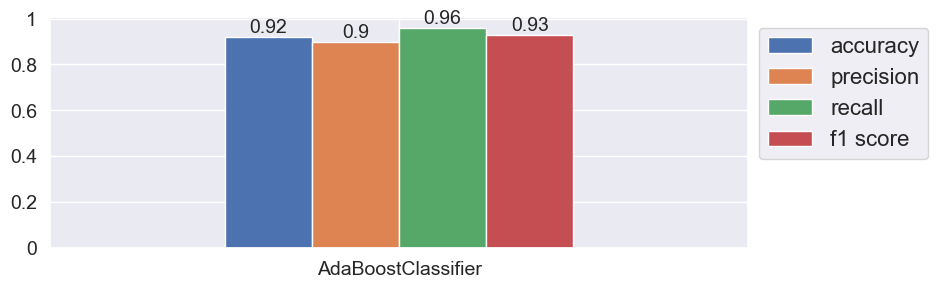

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2999584985.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


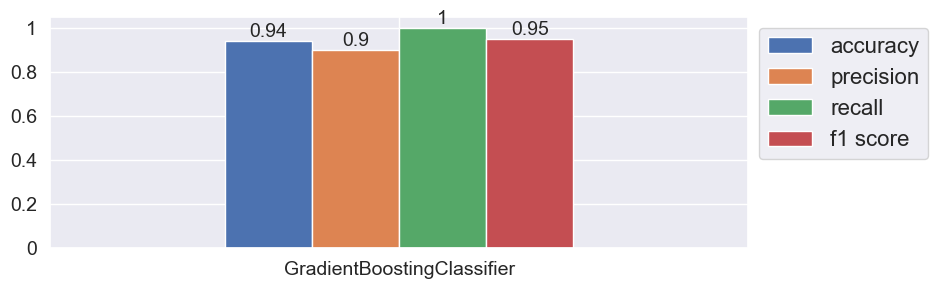

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2999584985.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


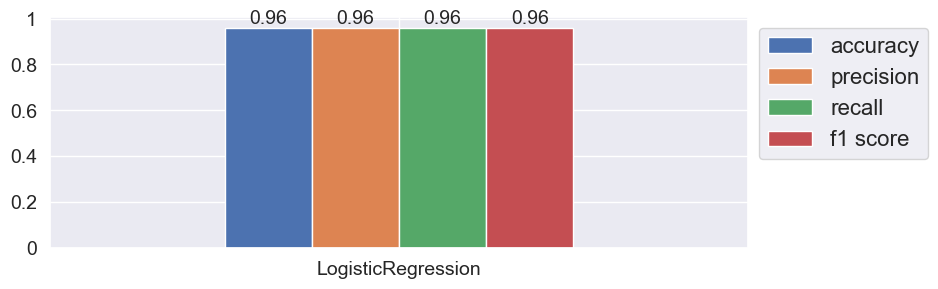

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2999584985.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


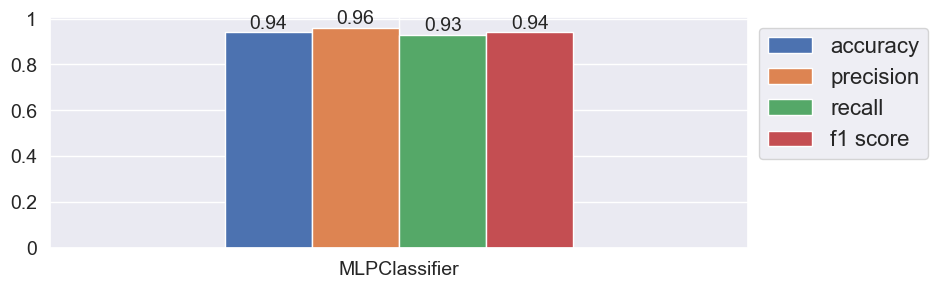

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2999584985.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


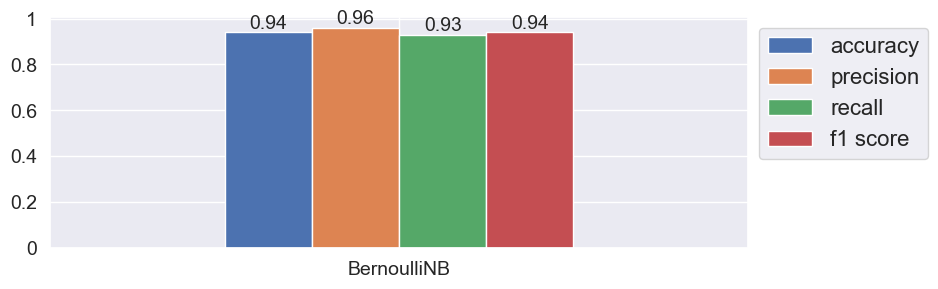

In [22]:
evaluation_df = pd.DataFrame({
    'accuracy':accuracy_list,
    'precision':precision_list,
    'recall':recall_list,
    'f1 score':f1_score_list},
    index=model_names)

# Plot evaluating results seperate
for i in range(len(evaluation_df)):
    
    sep_evaluation_df = pd.DataFrame({u'accuracy':accuracy_list[i], 
         u'precision':precision_list[i], 
         u'recall':recall_list[i], 
         u'f1 score':f1_score_list[i]},
         index=[model_names[i]]
         )
    sns.set(rc={'figure.figsize':(9, 3)})
    ax = sep_evaluation_df.plot.bar()
    
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=16)
    
    for container in ax.containers:
        ax.bar_label(container, fontsize=14)
    
    ax.set_xticklabels([model_names[i]], rotation=0, fontsize=14)
    ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)
    plt.show()

C:\Users\vasilis\AppData\Local\Temp\ipykernel_12880\2893712924.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


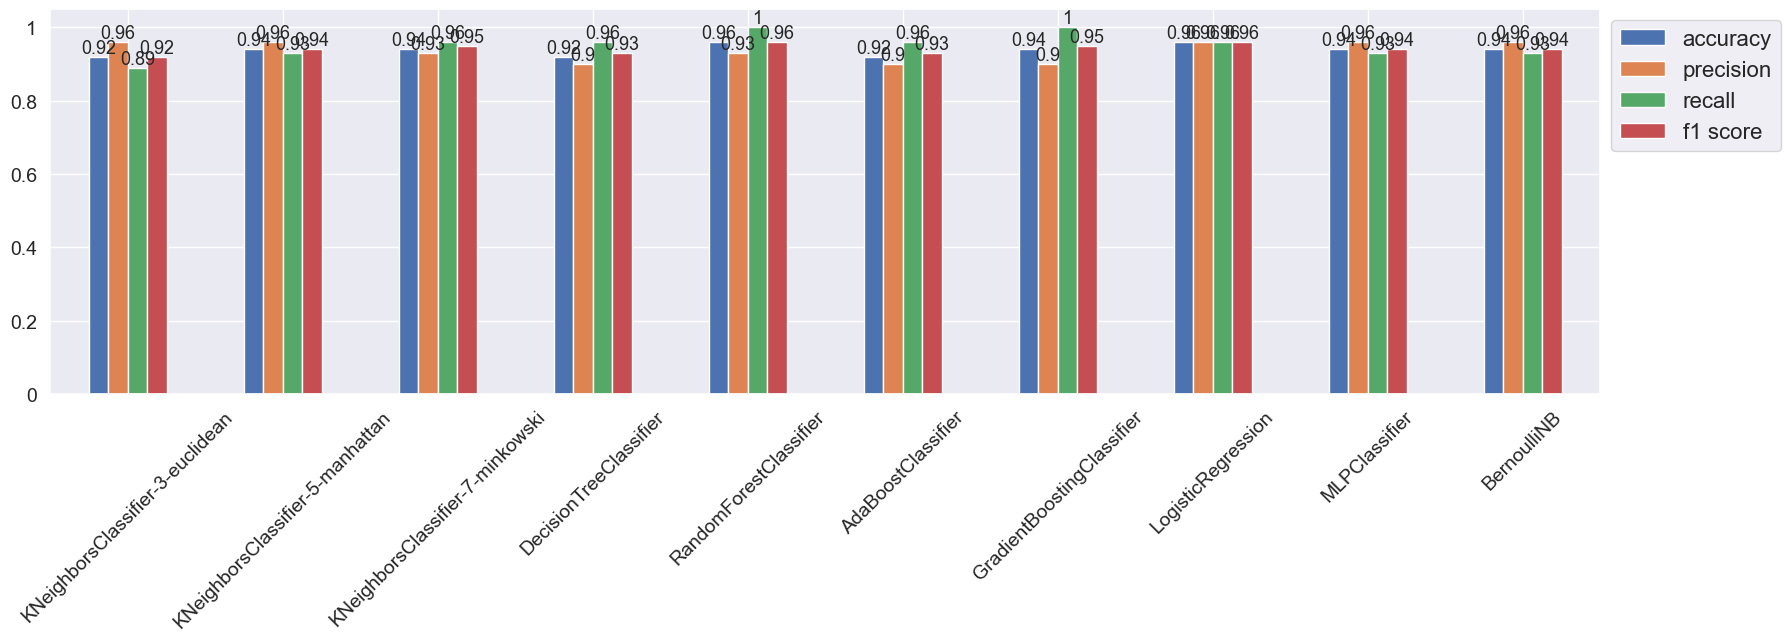

In [23]:
# Plot evaluating results together
sns.set()
sns.set_theme()

ax = evaluation_df.plot.bar(figsize=(20, 5))

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=13) # , rotation=90, fontweight='bold'

ax.set_xticklabels(model_names,rotation=45, fontsize=14) # 'horizontal'
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)
plt.show()

<font color='black'> The most optimum classifiers are <b><i>RandomForestClassifier</b></i> and <b><i>LogisticRegression</b></i>.</font>